In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

## a)

In [2]:
# Distance between 2 points
def distance(x,y):
    x = np.array(x)
    y = np.array(y)
    return np.linalg.norm(x-y)

In [4]:
# test
x = [1,2]
y = [1,4]
distance(x,y)

2.0

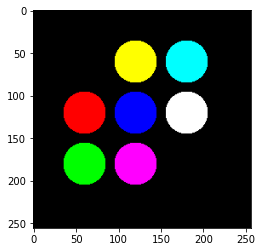

In [5]:
# Initialize a matrix of zeros
im = np.zeros((256,256,3))
radius = 25

# Color the image based on the distance from centers
for i in range(256):
    for j in range(256):
        if(distance([i,j], [120,60]) < radius):
            im[i,j] = [1,0,0] # red
        if(distance([i,j], [180,60]) < radius):
            im[i,j] = [0,1,0] # green

        if(distance([i,j], [60,120]) < radius):
            im[i,j] = [1,1,0] # yellow
        if(distance([i,j], [120,120]) < radius):
            im[i,j] = [0,0,1] # blue
        if(distance([i,j], [180,120]) < radius):
            im[i,j] = [1,0,1] # magenta
        
        if(distance([i,j], [60,180]) < radius):
            im[i,j] = [0,1,1] # cyan
        if(distance([i,j], [120,180]) < radius):
            im[i,j] = [1,1,1] # white

# Display image
plt.imshow(im)
plt.show()

## b)

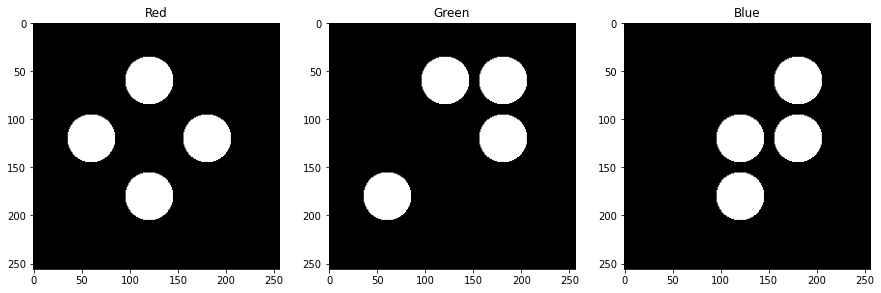

In [8]:
# Display R , G, B planes
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(im[:,:,0], 'gray')
plt.title("Red")

plt.subplot(1,3,2)
plt.imshow(im[:,:,1], 'gray')
plt.title("Green")

plt.subplot(1,3,3)
plt.imshow(im[:,:,2], 'gray')
plt.title("Blue")
plt.show()

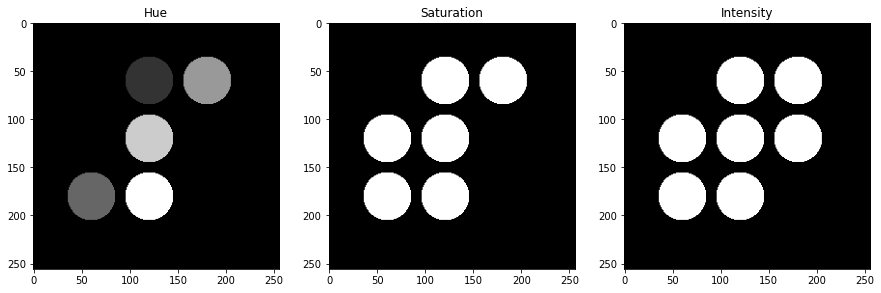

In [9]:
import cv2

def rgb2hsi(r1,g1,b1):
    with np.errstate(divide='ignore'):
        theta = np.arccos((((r1-g1) + (r1-b1))/2)/np.sqrt((r1-g1)*(r1-g1) + (r1-b1)*(g1-b1)))
    
    h = np.where(b1<=g1, theta, (2*np.pi)-theta)
    s = 1 - (np.minimum(np.minimum(r1,g1),b1)*3)/(r1+g1+b1)
    i = (r1+g1+b1)/3
    return h,s,i

# im=np.float32(im)
# h,s,i = rgb2hsi(im[:,:,0],im[:,:,1],im[:,:,2])
# im_hsi = np.dstack((h,s,i))

# Convert to HSV	
im_hsi = cv2.cvtColor(np.float32(im), cv2.COLOR_RGB2HSV)

# Display H, S, V planes
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(im_hsi[:,:,0], 'gray')
plt.title("Hue")

plt.subplot(1,3,2)
plt.imshow(im_hsi[:,:,1], 'gray')
plt.title("Saturation")

plt.subplot(1,3,3)
plt.imshow(im_hsi[:,:,2], 'gray')
plt.title("Intensity")
plt.show()